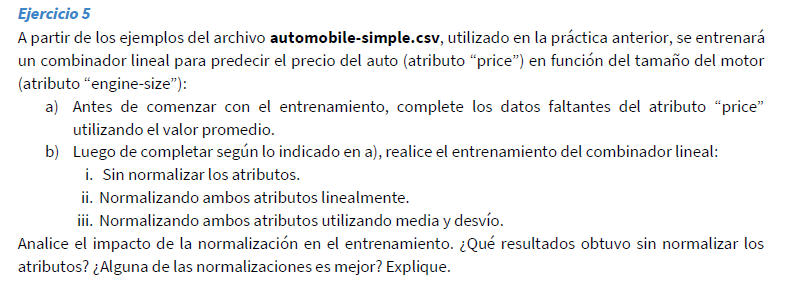

In [71]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [72]:
import pandas as pd      
import chardet


nombre_archivo = DATOS_DIR + 'automobile-simple.csv' 

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe

display(df)

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459
...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,four,sedan,2952,141,114.0,23,28,16845.0,721961.760,38.354298
201,volvo,gas,four,sedan,3049,141,160.0,19,25,19045.0,720913.920,32.043335
202,volvo,gas,four,sedan,3012,173,134.0,18,23,21485.0,721961.760,29.806494
203,volvo,diesel,four,sedan,3217,145,106.0,26,27,22470.0,721961.760,35.073342


In [73]:
mean_price = df["price"].mean()
df["price"] = df["price"].fillna(mean_price)
df.isnull().sum()

make            0
fuel-type       0
num-of-doors    2
body-style      0
curb-weight     0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           0
volume          0
eco-rating      0
dtype: int64

# Sin normalizar

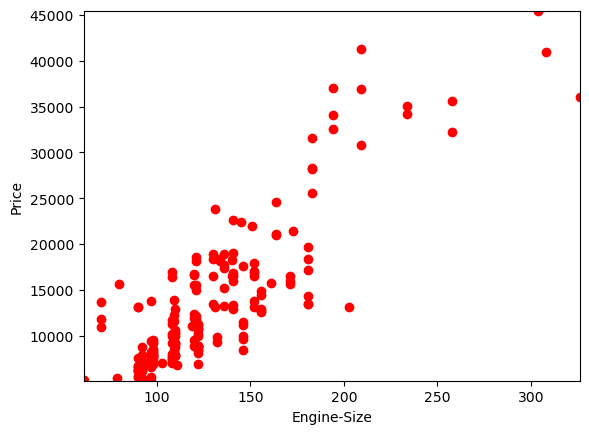

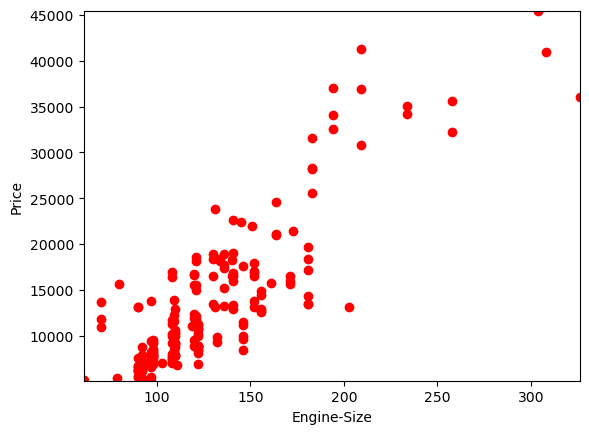

In [74]:
import numpy as np
from ClassNeuronaLineal import NeuronaLineal

X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

# entrena neurona lineal y grafica
nl = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001,random_state=None, draw=1, title=['Engine-Size', 'Price'])
nl.fit(X, Y)

In [75]:
print(nl.errors_)

[array([nan])]


# Normalizacion lineal

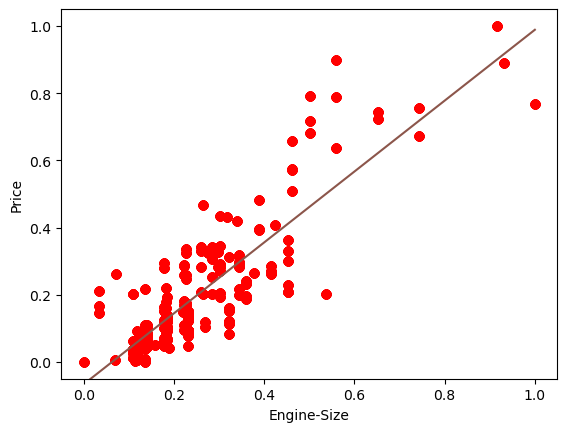

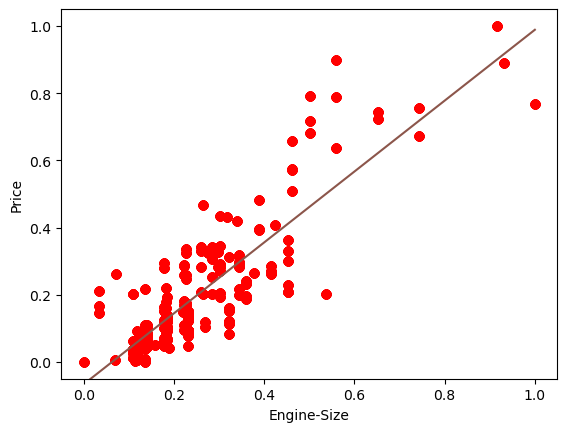

In [76]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data_scaler , targer_scaler= MinMaxScaler(), MinMaxScaler()
X = data_scaler.fit_transform(X)
Y = targer_scaler.fit_transform(Y)

# entrena neurona lineal y grafica
nl = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001,random_state=None, draw=1, title=['Engine-Size', 'Price'])
nl.fit(X, Y)

In [77]:
print(nl.errors_)

[array([10.43728535]), array([8.54779392]), array([7.42248105]), array([6.49263993]), array([5.72234934]), array([5.08417023]), array([4.55540823]), array([4.11727094]), array([3.75419654]), array([3.45329808]), array([3.20390354]), array([2.99717487]), array([2.82579265]), array([2.68369496]), array([2.56586115]), array([2.46813287]), array([2.38706579]), array([2.31980689]), array([2.26399285]), array([2.21766586]), array([2.17920397]), array([2.14726338]), array([2.12073066]), array([2.09868321]), array([2.08035644]), array([2.0651167]), array([2.05243878]), array([2.04188731]), array([2.03310133]), array([2.02578156]), array([2.01967982]), array([2.01459025]), array([2.01034208]), array([2.00679362]), array([2.0038273]), array([2.0013455]), array([1.99926717]), array([1.99752503]), array([1.99606315]), array([1.99483505]), array([1.99380213]), array([1.99293223]), array([1.99219865]), array([1.99157911]), array([1.99105511]), array([1.99061119]), array([1.99023449]), array([1.98991

# Normalizacion Estandar

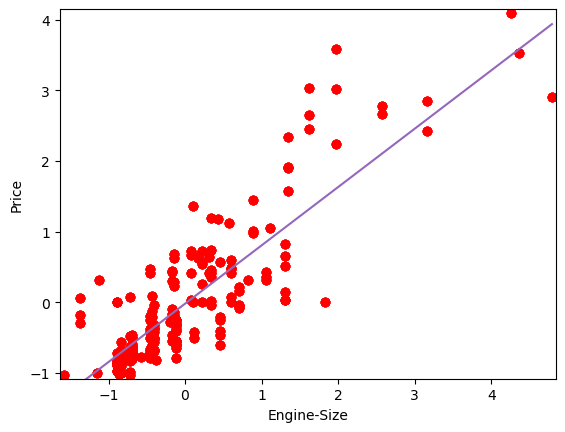

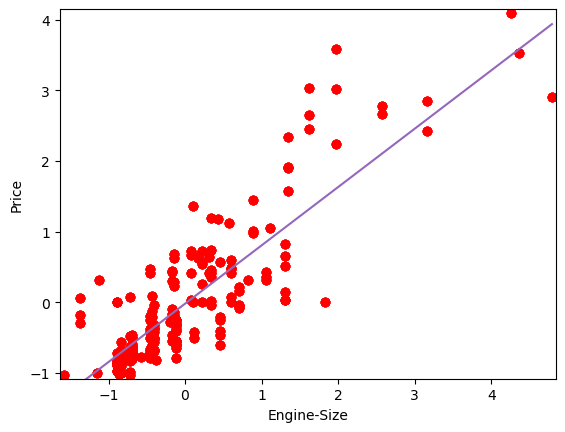

In [78]:
X = np.array(df['engine-size']).reshape((-1,1))
Y = np.array(df['price']).reshape((-1,1))

data_scaler , targer_scaler = StandardScaler(), StandardScaler()
X = data_scaler.fit_transform(X)
Y = targer_scaler.fit_transform(Y)

# entrena neurona lineal y grafica
nl = NeuronaLineal(alpha=0.02, n_iter=500, cotaE=0.0001,random_state=None, draw=1, title=['Engine-Size', 'Price'])
nl.fit(X, Y)

In [79]:
print(nl.errors_)

[array([71.22117826]), array([54.64692858]), array([54.62615574]), array([54.62602249]), array([54.62602201])]


preguntar analisis